In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from CustomFunction import custom_plot,custom_summary1,Label_Encoding
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore','FutureWarning')

In [2]:
sns.set_style('darkgrid')

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Lets drop the Id column as it is of now use
df.drop(columns='id',inplace=True)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
# Let check out the missing density of values in each feature
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Text(0.5, 25.0, 'Features')

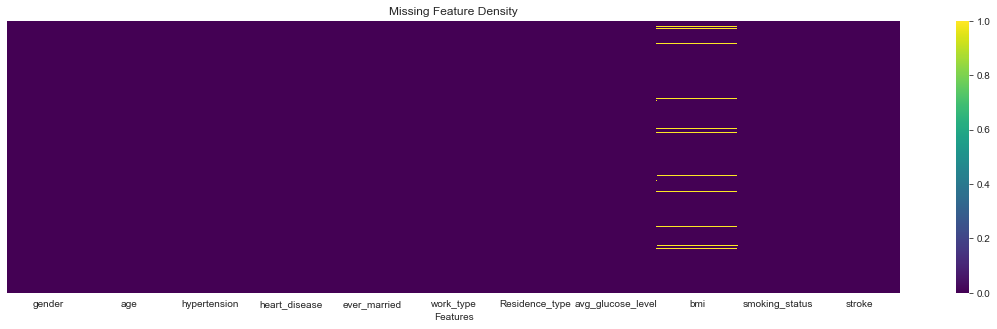

In [8]:
fig,ax=plt.subplots(figsize=(20,5)) 
sns.heatmap(df.isna(),cmap='viridis',yticklabels=False)
plt.title('Missing Feature Density')
plt.xlabel('Features')

In [9]:
df['bmi'].fillna(np.mean(df['bmi']),inplace=True)

In [10]:
#Density of the missing values.

Text(0.5, 25.0, 'Features')

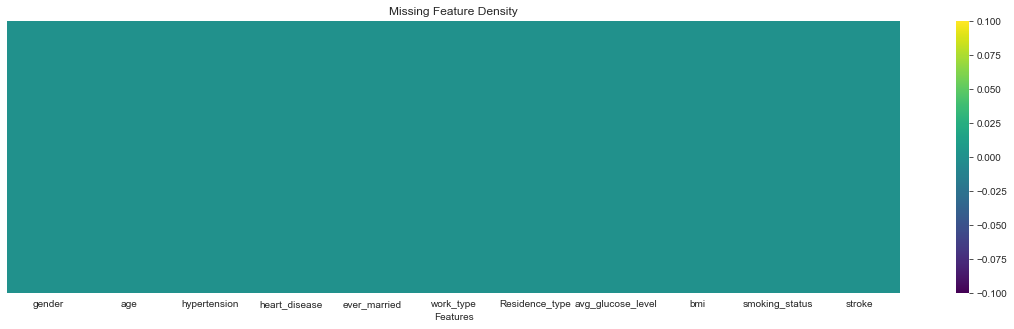

In [11]:
fig,ax=plt.subplots(figsize=(20,5)) 
sns.heatmap(df.isna(),cmap='viridis',yticklabels=False)
plt.title('Missing Feature Density')
plt.xlabel('Features')
# From the density we can see there is no missing values anymore

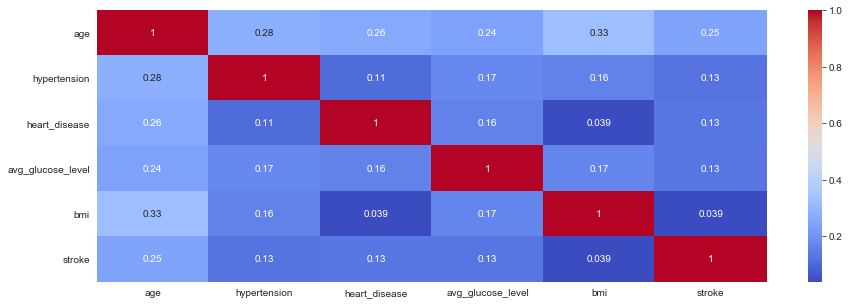

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# Treating Outliers

In [13]:
df_numerics=df.select_dtypes(exclude='object')
df_numerics.head(1)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1


In [14]:
# Descriptive statistics of all the available feature using custom function
custom_summary1(df)

,Feature_name,Count,Minimum,1st Quatile,Mean,Median,3rd Quatile,Maximum,Variance,STD,Kurtosis,KurtType,Skewness,SkewType
0,age,5110,0.08,25.000,43.227,45.000,61.00,82.00,511.332,22.613,-0.991,Platikurtic,-0.137,Fairly Skewed Distribution
1,hypertension,5110,0.00,0.000,0.097,0.000,0.00,1.00,0.088,0.297,5.375,Leptokurtic,2.715,Higly Skewed Distribution
2,heart_disease,5110,0.00,0.000,0.054,0.000,0.00,1.00,0.051,0.226,13.586,Leptokurtic,3.947,Higly Skewed Distribution
3,avg_glucose_level,5110,55.12,77.245,106.148,91.885,114.09,271.74,2050.601,45.284,1.680,Leptokurtic,1.572,Higly Skewed Distribution
4,bmi,5110,10.30,23.800,28.893,28.400,32.80,97.60,59.259,7.698,3.623,Leptokurtic,1.077,Higly Skewed Distribution
5,stroke,5110,0.00,0.000,0.049,0.000,0.00,1.00,0.046,0.215,15.590,Leptokurtic,4.193,Higly Skewed Distribution


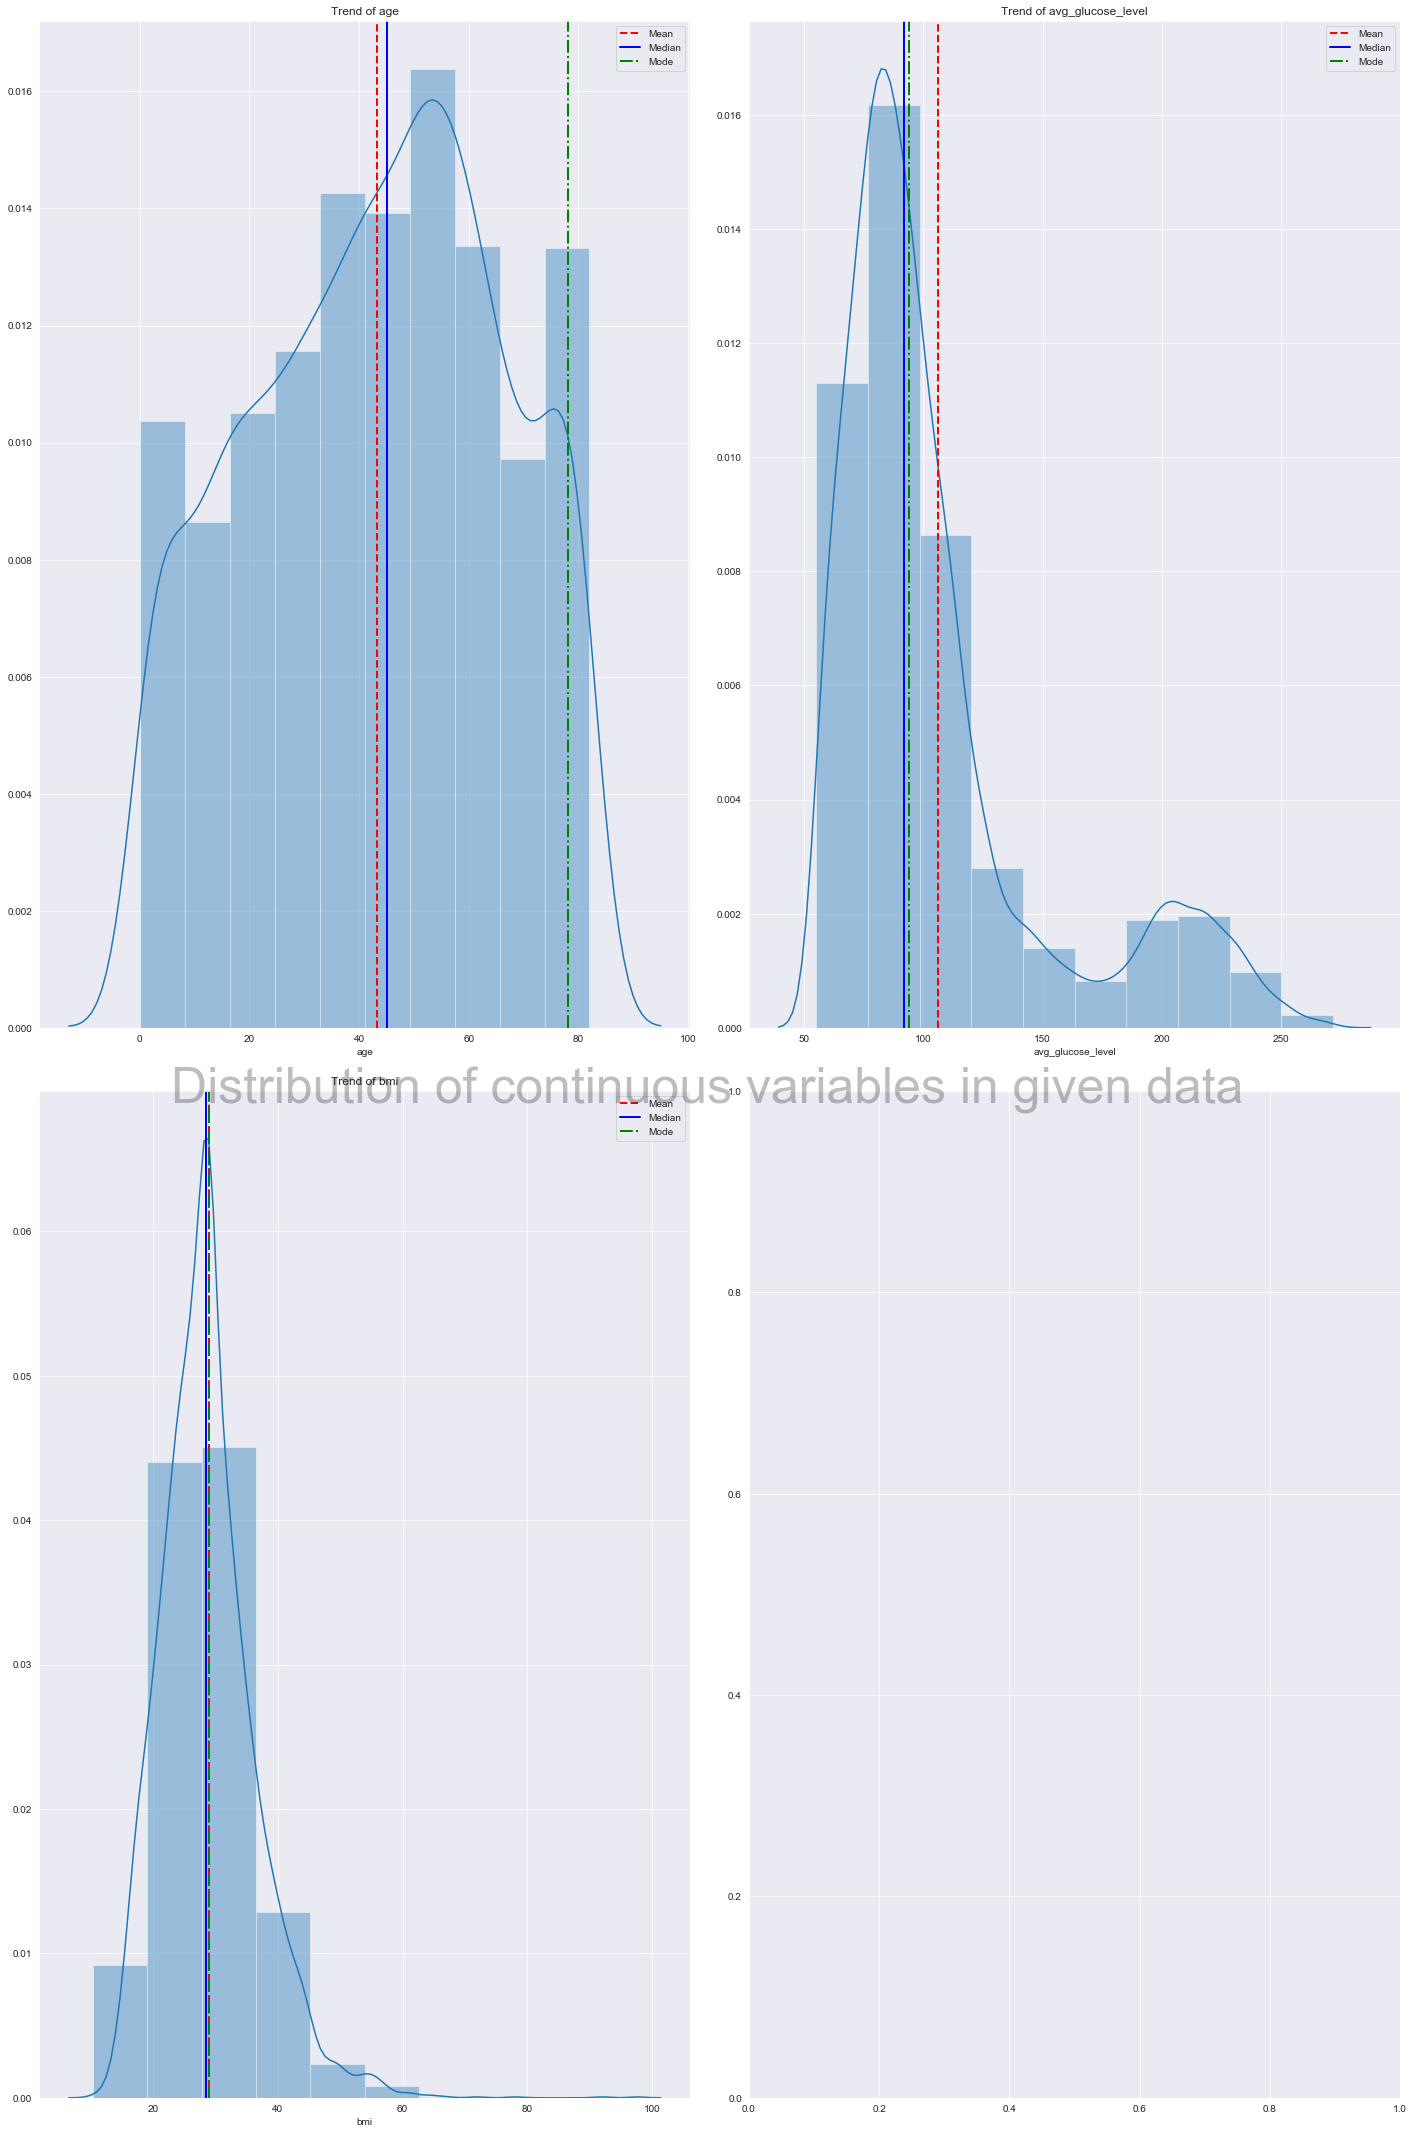

In [15]:
#Distribution plot of all the numerical variable which are continuous in nature
df_new=df[['age','avg_glucose_level','bmi']]
custom_plot(df_new)

# Preprocessing

In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [17]:
# Using custom function to do label encording
encorded_df=Label_Encoding(df)
encorded_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


## Checking imbalance in the dataset

In [18]:
# Assigning depended and independent variable
x=encorded_df.drop(columns='stroke')
y=encorded_df['stroke']

In [19]:
# Train Train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [20]:
df['stroke'].value_counts()
# As we can see below that the data is not balanced we will use SMOTE to make the target balance.

0    4861
1     249
Name: stroke, dtype: int64

In [21]:
print('Before oversampling values of labels 1 selected in target is :',sum(y_train==1))
print('Before oversampling values of labels 0 selected in target is :',sum(y_train==0))

Before oversampling values of labels 1 selected in target is : 162
Before oversampling values of labels 0 selected in target is : 3415


In [22]:
smote=SMOTE(random_state=101)

In [23]:
xb_train,yb_train=smote.fit_resample(x_train,y_train)

In [24]:
print('After oversampling values of labels 1 selected in target is :',sum(yb_train==1))
print('After oversampling values of labels 0 selected in target is :',sum(yb_train==0))

After oversampling values of labels 1 selected in target is : 3415
After oversampling values of labels 0 selected in target is : 3415


## So as we can see above the imbalance issue is sorted out. 

In [25]:
models=[]
models.append(['Logistic Regression',LogisticRegression(random_state=101)])
models.append(['Decision Tree Classifier',DecisionTreeClassifier(random_state=101)])
models.append(['Support Vector Machine',SVC(random_state=101)])
models.append(['KNN',KNeighborsClassifier()])
models.append(['Random Forest',RandomForestClassifier(random_state=101)])
models.append(['AdaBoost',AdaBoostClassifier(random_state=101)])
models.append(['GradientBoosting',GradientBoostingClassifier(random_state=101)])
models.append(['XGBoost',XGBClassifier(random_state=101)])

In [26]:
details=[]
for i in range(len(models)):
    metric=[]
    model=models[i][1]
    model.fit(xb_train,yb_train)
    modelpred=model.predict(x_test)
    cm=confusion_matrix(y_test,modelpred)
    acccuracyscore=accuracy_score(y_test,modelpred)
    cross_validation_score=cross_val_score(model,xb_train,yb_train,cv=10).mean()
    precisionscore=precision_score(y_test,modelpred)
    recallscore=recall_score(y_test,modelpred)
    f1score=f1_score(y_test,modelpred)
    print('Models is :',models[i][0])
    print('')
    print('Confusion Matrix:',cm)
    print('')
    print('Accuracy score:',acccuracyscore*100)
    print('')
    print('Mean Accuracy score though Cross Validation :',cross_validation_score*100)
    print('')
    print('Precision score :',precisionscore)
    print('')
    print('Recall Score :',recallscore)
    print('')
    print('f1 Score :',f1score)
    print('*'*60)
    print('')
    metric.append(models[i][0])
    metric.append(acccuracyscore*100)
    metric.append(cross_validation_score*100)
    metric.append(precisionscore)
    metric.append(recallscore)
    metric.append(f1score)
    details.append(metric)  

C:\Users\vikasmishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\vikasmishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

Models is : Logistic Regression

Confusion Matrix: [[1169  277]
 [  44   43]]

Accuracy score: 79.06066536203522

Mean Accuracy score though Cross Validation : 80.8199121522694

Precision score : 0.134375

Recall Score : 0.4942528735632184

f1 Score : 0.2113022113022113
************************************************************

Models is : Decision Tree Classifier

Confusion Matrix: [[1286  160]
 [  70   17]]

Accuracy score: 84.99673842139596

Mean Accuracy score though Cross Validation : 92.66471449487555

Precision score : 0.096045197740113

Recall Score : 0.19540229885057472

f1 Score : 0.1287878787878788
************************************************************

Models is : Support Vector Machine

Confusion Matrix: [[1059  387]
 [  23   64]]

Accuracy score: 73.25505544683627

Mean Accuracy score though Cross Validation : 77.62811127379209

Precision score : 0.1419068736141907

Recall Score : 0.735632183908046

f1 Score : 0.23791821561338292
*********************************

C:\Users\vikasmishra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vikasmishra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vikasmishra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vikasmishra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vikasmishra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vikasmishra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vikasmishra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vikasmishra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vikasmishra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vikasmishra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vikasmishra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Models is : XGBoost

Confusion Matrix: [[1373   73]
 [  76   11]]

Accuracy score: 90.28049575994781

Mean Accuracy score though Cross Validation : 95.73938506588581

Precision score : 0.13095238095238096

Recall Score : 0.12643678160919541

f1 Score : 0.1286549707602339
************************************************************



In [27]:
df=pd.DataFrame(details,columns=['Model Name','Accuracy Score','Cross Val. Accuracy','Precision Score',
                                 'Recall Score','F1 Score'])
df.sort_values(by=['Cross Val. Accuracy'],inplace=True,ascending=False)
df

,Model Name,Accuracy Score,Cross Val. Accuracy,Precision Score,Recall Score,F1 Score
7,XGBoost,90.280496,95.739385,0.130952,0.126437,0.128655
4,Random Forest,89.171559,94.948755,0.137615,0.172414,0.153061
1,Decision Tree Classifier,84.996738,92.664714,0.096045,0.195402,0.128788
3,KNN,79.256360,90.483163,0.121311,0.425287,0.188776
6,GradientBoosting,83.105023,89.004392,0.135593,0.367816,0.198142
5,AdaBoost,79.712981,84.363104,0.138710,0.494253,0.216625
0,Logistic Regression,79.060665,80.819912,0.134375,0.494253,0.211302
2,Support Vector Machine,73.255055,77.628111,0.141907,0.735632,0.237918


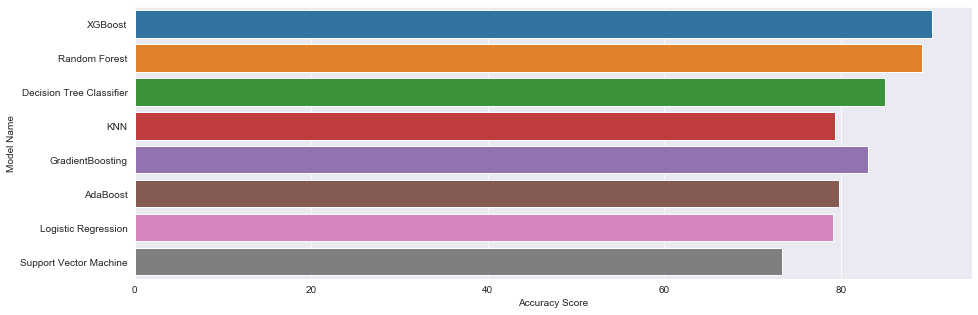

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(y='Model Name',x='Accuracy Score',data=df)

# Lets do the tuning using GridSearchCV to improve the model accuracy

In [ ]:
# 'gamma':[0.01,0.05,1],

In [50]:
modelgridcv=[]
modelgridcv.append(['XGBoost',XGBClassifier(use_label_encoder=False),[{'learning_rate': [0.01, 0.05, 0.1],
                'booster':['gbtree', 'gblinear','dart'],'eval_metric':['error']}]])
modelgridcv.append(['Decision Tree',DecisionTreeClassifier(),[{'criterion':['gini', 'entropy'],
    'splitter':['best','random'],'max_features' : ['auto', 'sqrt', 'log2'],'random_state':[101]}]])
modelgridcv.append(['Random Forest',RandomForestClassifier(),[{'n_estimators':[100,150,200],
            'criterion':['gini','entropy'],'random_state':[101]}]])
modelgridcv.append(['Kneighbour',KNeighborsClassifier(),[{'n_neighbors':[5,7,9,13,15,21,27,31,49,57,68],
                'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}]])

In [51]:
for i,j,k in modelgridcv:
    gridmodel=GridSearchCV(estimator=j,param_grid=k,cv=10)
    gridmodel.fit(xb_train,yb_train)
    accuracy=gridmodel.best_score_
    print(f'Model Name: {i}')
    print('')
    print('The best score obtained is:',accuracy*100)
    print('')
    print('The best parameter is: ',gridmodel.best_params_)
    print('*'*60)

Model Name: XGBoost

The best score obtained is: 93.6163982430454

The best parameter is:  {'booster': 'gbtree', 'eval_metric': 'error', 'learning_rate': 0.1}
************************************************************
Model Name: Decision Tree

The best score obtained is: 91.36163982430453

The best parameter is:  {'criterion': 'entropy', 'max_features': 'auto', 'random_state': 101, 'splitter': 'best'}
************************************************************
Model Name: Random Forest

The best score obtained is: 95.21229868228404

The best parameter is:  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 101}
************************************************************
Model Name: Kneighbour

The best score obtained is: 90.9077598828697

The best parameter is:  {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
************************************************************
